In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Pulling


In [2]:
artists = pd.read_csv('artists_reduced.csv')
designers = pd.read_csv('designers_reduced.csv')
games = pd.read_csv('games.csv')
mechanics = pd.read_csv('mechanics.csv')
publishers = pd.read_csv('publishers_reduced.csv')
ratings_dist = pd.read_csv('ratings_distribution.csv')
subcategories = pd.read_csv('subcategories.csv')
themes = pd.read_csv('themes.csv')
user_ratings = pd.read_csv('user_ratings.csv')

# Data Transformation

## Artists
- BGG ID
- Low-Exp artists indicates the game has an unlisted artist w/ < 3 games
- 1 column per artist name (1/0 indicates the artist)

**Transformation needed: sum all columns all to get the total number of artists that worked on the game**

In [3]:
artists.head()

,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,Björn Pertoft,...,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,BGGId,Low-Exp Artist
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [4]:
# creating column indicating how many artists worked on the game
cols = [c for c in artists.columns if c not in ['BGGId','Low-Exp Artist']]
artists['total_artists_contributed'] = artists[cols].sum(axis=1)

In [5]:
final_artists = artists[['BGGId','Low-Exp Artist','total_artists_contributed']]
final_artists.head()

,BGGId,Low-Exp Artist,total_artists_contributed
0,1,1,1
1,2,1,0
2,3,0,1
3,4,1,0
4,5,0,2


## Designers
- Same structure as artists

**Transformation needed: sum all columns all to get the total number of designers that worked on the game**

In [6]:
designers.head()

,Karl-Heinz Schmiel,"G. W. ""Jerry"" D'Arcey",Reiner Knizia,Sid Sackson,Jean du Poël,Martin Wallace,Richard Ulrich,Wolfgang Kramer,Alan R. Moon,Uwe Rosenberg,...,Thomas Dupont,Mathieu Casnin,Sean Fletcher,Moritz Dressler,Molly Johnson,Robert Melvin,Shawn Stankewich,Nathan Meunier,BGGId,Low-Exp Designer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [7]:
# creating column indicating how many artists worked on the game
cols = [c for c in designers.columns if c not in ['BGGId','Low-Exp Designer']]
designers['total_designers_contributed'] = designers[cols].sum(axis=1)

In [8]:
final_designers = designers[['BGGId','Low-Exp Designer','total_designers_contributed']]

In [9]:
final_designers.head()

,BGGId,Low-Exp Designer,total_designers_contributed
0,1,0,1
1,2,0,1
2,3,0,1
3,4,1,0
4,5,0,1


## Games
**Transformation needed: remove columns like name & description that will not be used in clustering**

In [10]:
games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [11]:
suppressed_columns =['Name','Description','Family','GoodPlayers', 'ImagePath']
final_cols = [c for c in games.columns if c not in suppressed_columns]

final_games = games[final_cols]
final_games.head()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,...,21926,21926,0,1,0,0,0,0,0,0
1,2,1981,1.9630,6.64537,5.78447,1.45440,3,4,NaN,27.000000,...,21926,21926,0,1,0,0,0,0,0,0
2,3,1998,2.4859,7.45601,7.23994,1.18227,2,4,9.307692,1.000000,...,21926,21926,0,1,0,0,0,0,0,0
3,4,1992,2.6667,6.60006,5.67954,1.23129,2,4,13.000000,256.000000,...,21926,21926,0,0,0,0,0,0,0,0
4,5,1964,2.5031,7.33861,7.14189,1.33583,2,6,11.410256,21.152941,...,21926,21926,0,1,0,0,0,0,0,0


# Mechanics

**Keeping all mechanics for clustering process**

In [12]:
mechanics.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Publishers
**Keeping all publishers for clustering process**

In [13]:
publishers.head()

,Hans im Glück,Moskito Spiele,Portal Games,Spielworxx,Stronghold Games,"Valley Games, Inc.",YOKA Games,sternenschimmermeer,E.S. Lowe,Milton Bradley,...,Cacahuete Games,BlackSands Games,Norsker Games,Perro Loko Games,Funko Games,Origame,Deep Print Games,Hidden Industries GmbH,BGGId,Low-Exp Publisher
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1


## Rating Distribution

**Transformation needed: bucket the ratings at whole numbers**

In [14]:
ratings_dist.head()

,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,5.0,11.0,86.0,3.0,4.0,6.0,8.0,426.0,5352.0
1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,562.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,4.0,77.0,3.0,1.0,5.0,3.0,477.0,15148.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,342.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,8.0,4.0,82.0,7.0,9.0,10.0,5.0,905.0,18387.0


In [15]:
for i in list(range(0,11)):
    converted_cols = [c for c in ratings_dist.columns if c not in ['BGGId','total_ratings'] and 'bucket' not in c]
    cols = [c for c in converted_cols if float(c) >= i and float(c) < i+1]
    ratings_dist['rating_bucket_'+str(i)] = ratings_dist[cols].sum(axis=1)
final_ratings_dist = ratings_dist[[c for c in ratings_dist.columns if 'bucket' in c or c in ['BGGId','total_ratings']]]

In [16]:
final_ratings_dist.head()

,BGGId,total_ratings,rating_bucket_0,rating_bucket_1,rating_bucket_2,rating_bucket_3,rating_bucket_4,rating_bucket_5,rating_bucket_6,rating_bucket_7,rating_bucket_8,rating_bucket_9,rating_bucket_10
0,1,5352.0,0.0,0.0,24.0,60.0,92.0,231.0,628.0,1312.0,1598.0,981.0,426.0
1,2,562.0,0.0,3.0,2.0,9.0,19.0,75.0,162.0,157.0,83.0,35.0,17.0
2,3,15148.0,0.0,0.0,0.0,16.0,170.0,506.0,2039.0,5505.0,4807.0,1628.0,477.0
3,4,342.0,0.0,0.0,0.0,5.0,10.0,44.0,109.0,107.0,49.0,15.0,3.0
4,5,18387.0,0.0,0.0,0.0,0.0,56.0,945.0,2996.0,6587.0,4952.0,1946.0,905.0


## Subcategories 

No transformation needed

In [17]:
subcategories.head()

,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0


## Themes

No transformation needed

In [18]:
themes.head()

,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## User ratings

**Transformation needed: aggregate ratings per game**

In [19]:
user_ratings.head()

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP


In [20]:
final_user_ratings = user_ratings.groupby('BGGId').agg({'Rating': ['mean','median','min', 'max','std']})
final_user_ratings = final_user_ratings.droplevel(level=0,axis=1).reset_index()

names_dict = dict = {
        'mean': 'rating_average',
        'median': 'rating_median',
        'min': 'rating_min',
        'max': 'rating_max',
        'std': 'rating_std'}

final_user_ratings.rename(columns=names_dict,inplace=True)

In [21]:
final_user_ratings.head()

,BGGId,rating_average,rating_median,rating_min,rating_max,rating_std
0,1,7.672014,8.0,2.0,10.0,1.468025
1,2,6.642697,7.0,1.0,10.0,1.472245
2,3,7.484350,7.5,3.0,10.0,1.117447
3,4,6.599476,7.0,3.0,10.0,1.230103
4,5,7.439818,7.3,4.0,10.0,1.174464


# Final Dataset

In [22]:
df = final_games.merge(final_artists,on='BGGId',how='left')
df = df.merge(final_designers,on='BGGId',how='left')
df = df.merge(final_ratings_dist,on='BGGId',how='left')
df = df.merge(final_user_ratings,on='BGGId',how='left')
df = df.merge(mechanics,on='BGGId',how='left')
df = df.merge(publishers,on='BGGId',how='left')
df = df.merge(subcategories,on='BGGId',how='left')
df = df.merge(themes,on='BGGId',how='left')

In [23]:
# df.columns[df.isna().any()].tolist()
df[df.columns[df.isna().any()].tolist()].isnull().sum()

ComAgeRec       5530
LanguageEase    5891
dtype: int64

In [24]:
# Fill NAs
df = df.fillna(0)

In [25]:
df[df.columns[df.isna().any()].tolist()].isnull().sum()

Series([], dtype: float64)

In [26]:
#df.to_csv('final_data_combined.csv')

# PCA
- Lower dimensionality as we have 2K columns

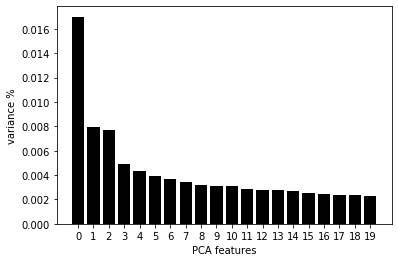

In [27]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

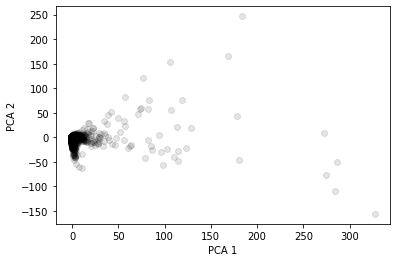

In [28]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

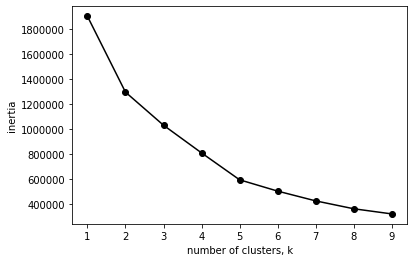

In [29]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [30]:
kmeans_pca = KMeans(
     init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=42
 )

In [31]:
kmeans_pca.fit(PCA_components.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [32]:
df['cluster'] = kmeans_pca.labels_

In [33]:
df.cluster.value_counts()

2    19690
3     1981
1      215
4       30
0        9
Name: cluster, dtype: int64

## Re-Clustering for cluster 2

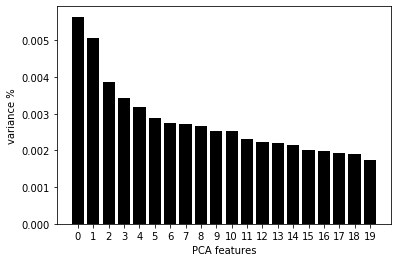

In [34]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df[(df.cluster==2)])

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

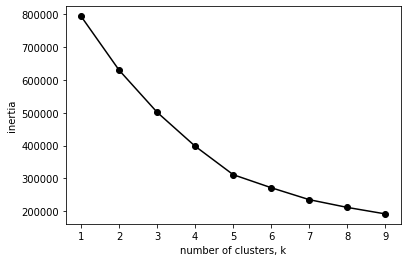

In [35]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'PCA 2')

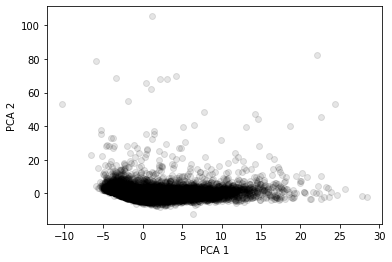

In [36]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [37]:
kmeans_pca_2 = KMeans(
     init="random",
     n_clusters=7,
     n_init=10,
     max_iter=300,
     random_state=42
 )

In [38]:
kmeans_pca_2.fit(PCA_components.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [39]:
df_0 = df[(df.cluster==2)]

In [40]:
df_0['cluster_2'] = kmeans_pca_2.labels_

C:\Users\OWNER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_0.cluster_2.value_counts()

4    10300
5     4350
0     3245
3     1308
6      445
2       21
1       21
Name: cluster_2, dtype: int64

In [42]:
df_0 = df_0[['BGGId','cluster_2']]

In [43]:
df_0.head()

,BGGId,cluster_2
1,2,5
3,4,5
5,6,4
6,7,3
7,8,5


In [44]:
df = df.merge(df_0,on='BGGId',how='left')

In [45]:
df['final_cluster'] = np.where(df.cluster_2.isna(),df.cluster,df.cluster_2+5)

In [46]:
df.final_cluster.value_counts()

9.0     10300
10.0     4350
5.0      3245
3.0      1981
8.0      1308
11.0      445
1.0       215
4.0        30
7.0        21
6.0        21
0.0         9
Name: final_cluster, dtype: int64

In [47]:
df = df.merge(games[['BGGId','Name']],on='BGGId',how='left')

In [48]:
#df.to_csv("final_data_with_clusters.csv")

## Similarity Score

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21925 entries, 0 to 21924
Columns: 2317 entries, BGGId to Name
dtypes: float64(25), int32(1), int64(2290), object(1)
memory usage: 387.7+ MB


In [51]:
df.head()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification,cluster,cluster_2,final_cluster,Name
0,1,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,...,0,0,0,0,0,0,3,NaN,3.0,Die Macher
1,2,1981,1.9630,6.64537,5.78447,1.45440,3,4,0.000000,27.000000,...,0,0,0,0,0,0,2,5.0,10.0,Dragonmaster
2,3,1998,2.4859,7.45601,7.23994,1.18227,2,4,9.307692,1.000000,...,0,0,0,0,0,0,1,NaN,1.0,Samurai
3,4,1992,2.6667,6.60006,5.67954,1.23129,2,4,13.000000,256.000000,...,0,0,0,0,0,0,2,5.0,10.0,Tal der Könige
4,5,1964,2.5031,7.33861,7.14189,1.33583,2,6,11.410256,21.152941,...,0,0,0,0,0,0,3,NaN,3.0,Acquire


In [52]:
##Greater_than = df[df['Sales'] > 300]
df = df[df['Rank:boardgame'] <= 5000 ]
df.reset_index(inplace=True,drop=True)
df.head()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification,cluster,cluster_2,final_cluster,Name
0,1,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,...,0,0,0,0,0,0,3,NaN,3.0,Die Macher
1,2,1981,1.9630,6.64537,5.78447,1.45440,3,4,0.000000,27.000000,...,0,0,0,0,0,0,2,5.0,10.0,Dragonmaster
2,3,1998,2.4859,7.45601,7.23994,1.18227,2,4,9.307692,1.000000,...,0,0,0,0,0,0,1,NaN,1.0,Samurai
3,5,1964,2.5031,7.33861,7.14189,1.33583,2,6,11.410256,21.152941,...,0,0,0,0,0,0,3,NaN,3.0,Acquire
4,7,1978,1.7950,6.52083,6.13713,1.32963,2,2,8.142857,51.000000,...,0,0,0,0,0,0,2,3.0,8.0,Cathedral


In [53]:
cols = [c for c in df.columns if 'cluster' not in c and 'Name' not in c]
print(len(cols))

2313


In [54]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cols])

In [55]:
print(len(scaled_features))

4994


In [56]:
##similarities = cosine_similarity(scaled_features.transpose())
similarities = cosine_similarity(scaled_features)

In [57]:
name_mapping = df[['Name']]

In [58]:
##name_mapping

In [59]:
cosine_sims = pd.DataFrame(similarities)

In [60]:
cosine_sims.head()

,0,1,2,3,4,5,6,7,8,9,...,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993
0,1.000000,-0.009944,0.038049,0.005758,-0.005512,0.107788,-0.009008,0.004981,0.012674,0.008561,...,-0.016436,-0.000541,-0.028588,-0.015786,0.007134,-0.017945,-0.009190,-0.040412,-0.028731,-0.017572
1,-0.009944,1.000000,-0.021314,-0.012080,-0.000356,0.024154,0.003185,-0.019844,-0.011878,-0.022498,...,-0.001788,-0.021183,-0.000395,-0.005563,-0.036216,-0.009261,-0.028157,0.040558,-0.006083,0.015371
2,0.038049,-0.021314,1.000000,0.019969,-0.002946,0.205119,0.027078,0.062399,0.102631,0.121828,...,-0.014609,0.043203,-0.028865,-0.005615,0.029406,-0.043240,0.033736,-0.036292,-0.003981,0.062176
3,0.005758,-0.012080,0.019969,1.000000,-0.001093,-0.004153,0.000353,0.019789,0.017940,0.049749,...,-0.011031,-0.003131,-0.015140,-0.010608,0.004794,-0.022413,0.002175,-0.020746,-0.017280,-0.012148
4,-0.005512,-0.000356,-0.002946,-0.001093,1.000000,0.001312,-0.004007,0.004300,-0.002836,-0.002025,...,-0.004525,-0.011072,0.009370,-0.007877,-0.010901,-0.017494,-0.007835,-0.010438,-0.010902,0.005844


In [61]:
cosine_sims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Columns: 4994 entries, 0 to 4993
dtypes: float64(4994)
memory usage: 190.3 MB


In [62]:
cosine_sims = name_mapping.join(cosine_sims)

In [63]:
cosine_sims.rename(columns=name_mapping.to_dict()['Name'],inplace=True)

In [64]:
cosine_sims.tail()

,Name,Die Macher,Dragonmaster,Samurai,Acquire,Cathedral,El Caballero,Elfenland,Bohnanza,Ra,...,Bad Company,Great Western Trail (Second Edition),Super Mega Lucky Box,World of Warcraft: Wrath of the Lich King,Ark Nova,Horrified: American Monsters,Boonlake,Mindbug,7 Wonders: Architects,Azul: Queen's Garden
4989,Horrified: American Monsters,-0.017945,-0.009261,-0.043240,-0.022413,-0.017494,-0.060123,-0.018360,-0.064219,0.023428,...,0.102945,0.150829,0.087093,0.099722,0.166292,1.000000,0.069859,0.099355,0.062795,0.002009
4990,Boonlake,-0.009190,-0.028157,0.033736,0.002175,-0.007835,-0.008193,0.032740,-0.011694,-0.016727,...,0.099935,0.183163,0.016041,0.011737,0.334072,0.069859,1.000000,0.017812,-0.000816,0.072600
4991,Mindbug,-0.040412,0.040558,-0.036292,-0.020746,-0.010438,-0.125502,-0.046393,-0.069891,-0.041985,...,0.121268,0.104713,0.209378,0.100830,0.121752,0.099355,0.017812,1.000000,0.128520,0.063724
4992,7 Wonders: Architects,-0.028731,-0.006083,-0.003981,-0.017280,-0.010902,-0.076023,-0.002568,-0.014488,0.017624,...,0.040082,0.047020,0.078530,0.114362,0.082056,0.062795,-0.000816,0.128520,1.000000,0.047455
4993,Azul: Queen's Garden,-0.017572,0.015371,0.062176,-0.012148,0.005844,-0.006058,-0.013110,-0.012133,-0.002992,...,0.018155,0.073709,0.066339,0.021962,0.061626,0.002009,0.072600,0.063724,0.047455,1.000000


In [ ]:
cosine_sims.info()

In [ ]:
#long_df = pd.melt(cosine_sims,id_vars=['Name'],var_name = "related game",value_name = "sim_score")

In [ ]:
#long_df.head()

In [ ]:
#cosine_sims = cosine_sims.to_numpy()

In [ ]:
#cosine_sims.to_csv("all_similarities.csv")

## LONG WAY

In [ ]:
# d = pd.read_csv('data/output/final_data_combined.csv',index_col=0)

In [ ]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(d)
# ks = range(1, 10)
# inertias = []
# for k in ks:
#     # Create a KMeans instance with k clusters: model
#     model = KMeans(n_clusters=k)
    
#     # Fit model to samples
#     model.fit(scaled_features)
    
#     # Append the inertia to the list of inertias
#     inertias.append(model.inertia_)
    
# plt.plot(ks, inertias, '-o', color='black')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()

## Experiments

### Internal Validation

### Davies - Bouldin Index

the Davies-Bouldin is an internal validation score and is used to evaluate the goodness of split by a k-Means clustering algorithm for a given number of clusters. Lower Score indicates clusters further apart and less dispersed

In [65]:
##Import library
from sklearn.metrics import davies_bouldin_score

In [66]:
##Test on cluster 2
X2 = PCA_components.iloc[:,:4]
labels2 = kmeans_pca_2.labels_
davies_bouldin_score(X2,labels2)

0.8649217858896086

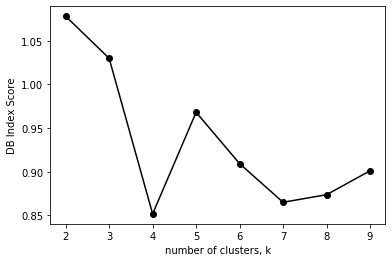

In [67]:
ks = range(2, 10)
DBs = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(
     init="random",
     n_clusters=k,
     n_init=10,
     max_iter=300,
     random_state=42
    )
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    DBs.append(davies_bouldin_score(X2,model.labels_))
    
plt.plot(ks, DBs, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('DB Index Score')
plt.xticks(ks)
plt.show()

## Calinski-Harabasz Index

If the ground truth labels are not known, the Calinski-Harabasz index also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

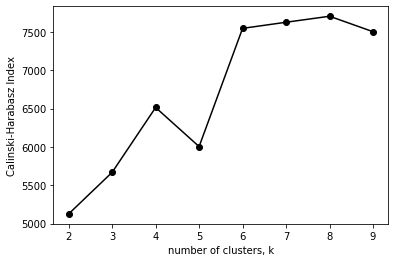

In [68]:
from sklearn.metrics import calinski_harabasz_score
ks = range(2, 10)
CHs = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(
     init="random",
     n_clusters=k,
     n_init=10,
     max_iter=300,
     random_state=42
    )
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    CHs.append(calinski_harabasz_score(X2,model.labels_))
    
plt.plot(ks, CHs, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Calinski-Harabasz Index')
plt.xticks(ks)
plt.show()

## Silhouette Coefficient

if the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [69]:
from sklearn.metrics import silhouette_score

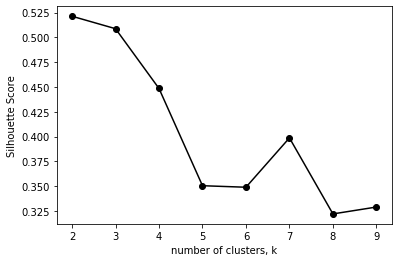

In [70]:
ks = range(2, 10)
SHs = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(
     init="random",
     n_clusters=k,
     n_init=10,
     max_iter=300,
     random_state=42
    )
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    SHs.append(silhouette_score(X2,model.labels_))
    
plt.plot(ks, SHs, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

In [71]:
5000 * 5000

25000000